In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [2]:
dfal = pd.read_csv("Algerian_forest_fires_cleaned.csv",)
dfal.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
dfal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [4]:
dfal.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [5]:
dfal.duplicated().sum()

0

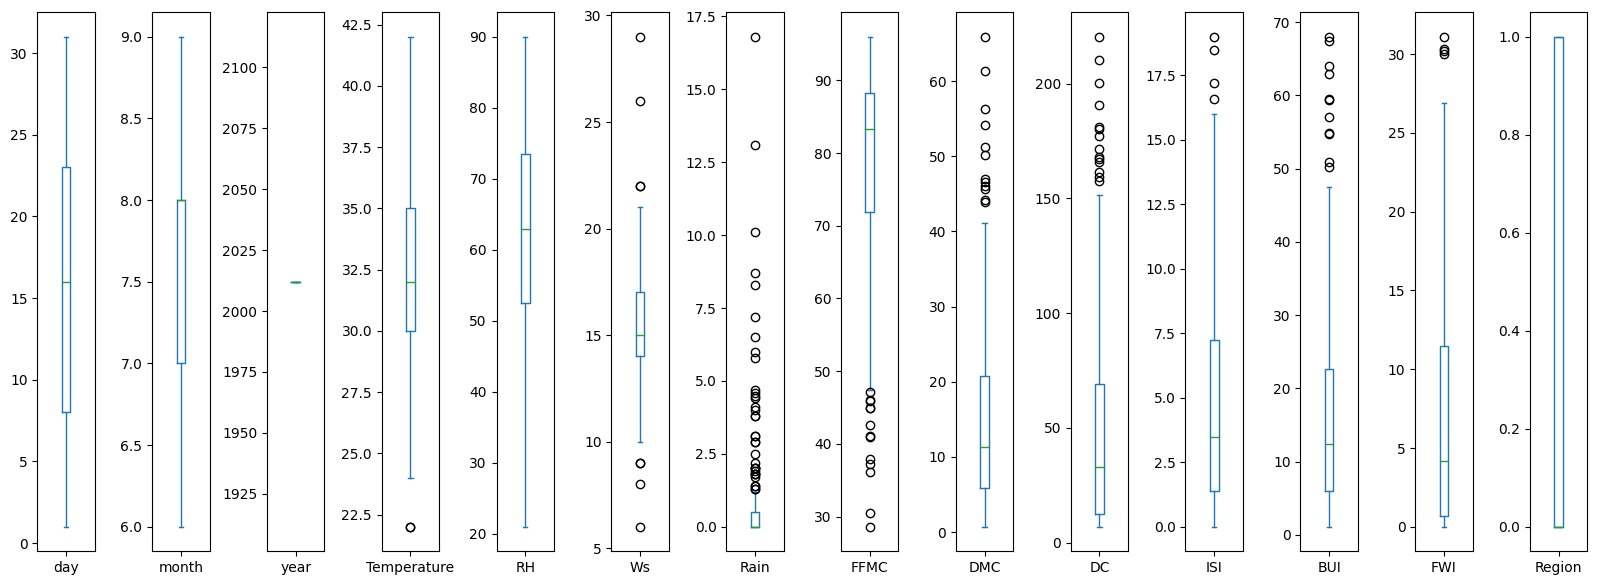

In [6]:
dfal.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(20, 7)
)
plt.subplots_adjust(wspace=1) 
plt.show()

In [7]:
dfal.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [8]:
for column in ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']:
    Q1 = dfal[column].quantile(0.25)
    Q3 = dfal[column].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - 1.5 * IQR
    upperBound = Q3 + 1.5 * IQR
    dfal = dfal[(dfal[column] >= lowerBound) & (dfal[column] <= upperBound)]

In [9]:
dfal.shape

(155, 15)

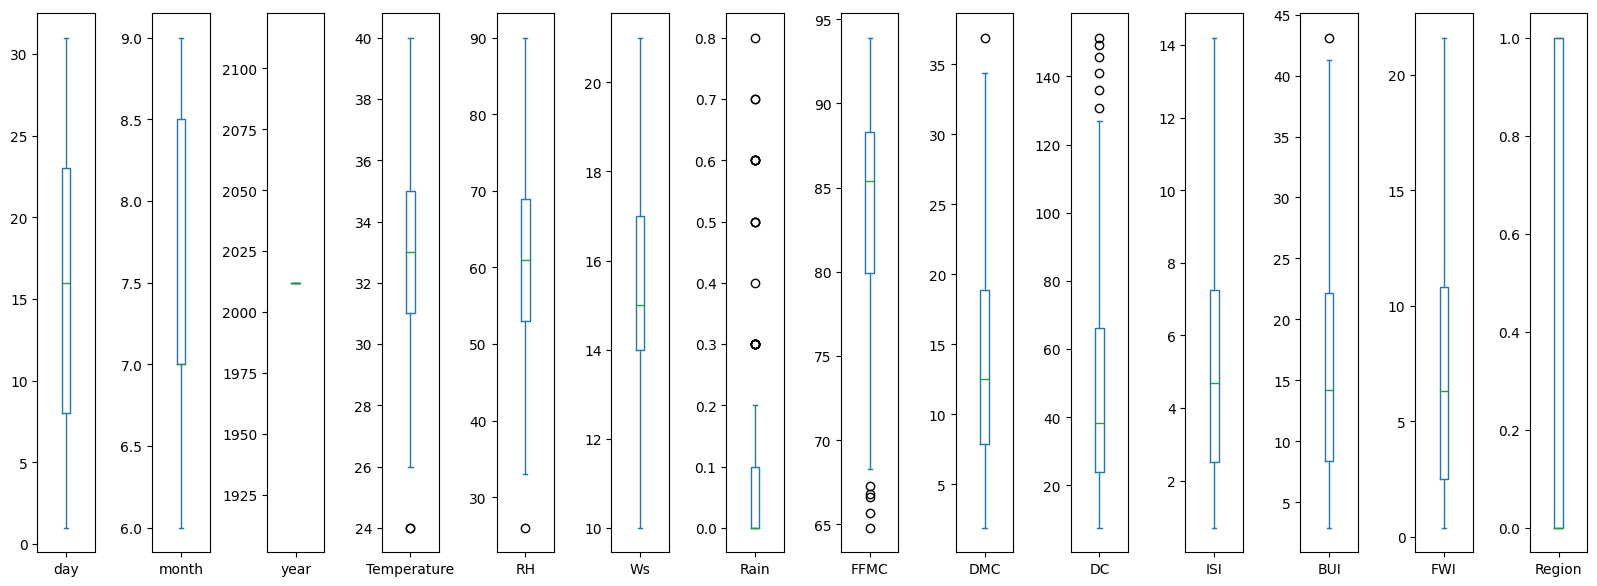

In [10]:
dfal.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(20, 7)
)
plt.subplots_adjust(wspace=1) 
plt.show()

Non-numeric columns: Index(['Classes'], dtype='object')


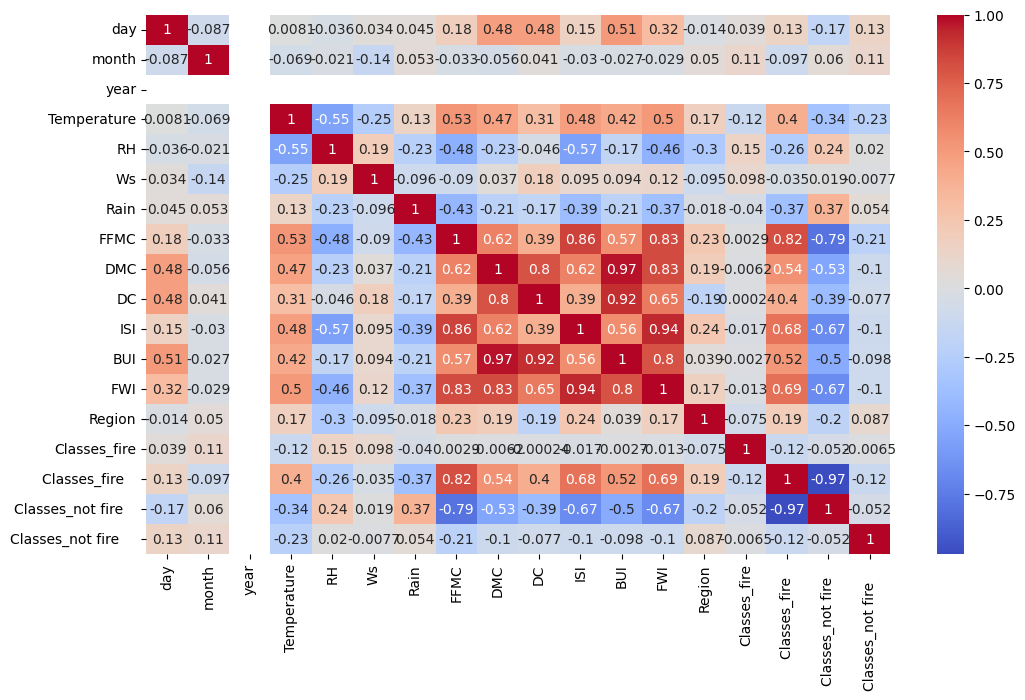

In [11]:
non_numeric_columns = dfal.select_dtypes(exclude='number').columns
print("Non-numeric columns:", non_numeric_columns)
 
non_numeric_columns = dfal.select_dtypes(exclude='number').columns

dfalgForest_encoded = pd.get_dummies(dfal, columns=['Classes'])


corr_matrix = dfalgForest_encoded.corr()


plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
 




In [12]:
X = dfal[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Region']]
Y = dfal['FWI']

In [13]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
ss = StandardScaler()
trainXsc = ss.fit_transform(trainX)
testXsc = ss.transform(testX)

In [15]:
lrModel1 = LinearRegression()

In [16]:
lrModel1.fit(trainXsc, trainY)

LinearRegression()

In [17]:
lrModel1.coef_, lrModel1.intercept_

(array([ 7.66142189e-02,  1.03426229e-01, -3.33066907e-15,  9.70186426e-02,
        -4.35895603e-02,  4.04057221e-02, -1.74817394e-01, -3.05031870e-01,
        -6.03373627e-01, -6.78002795e-01,  3.96507877e+00,  3.43592820e+00,
        -1.45462523e-01]),
 7.499999999999999)

In [18]:
yPred = lrModel1.predict(testXsc)

In [19]:
mse = mean_squared_error(testY,yPred)
mae = mean_absolute_error(testY,yPred)
rsq = r2_score(testY,yPred)
print("Model 1 MSE : ", mse)
print("Model 1 MAE : ", mae)
print("Model 1 R2 : ", rsq)

Model 1 MSE :  0.23429979069022078
Model 1 MAE :  0.3647209902486048
Model 1 R2 :  0.9909192646893801


In [20]:
X = dfal[['month', 'Temperature', 'RH', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
ss = StandardScaler()
trainXsc = ss.fit_transform(trainX)
testXsc = ss.transform(testX)

In [21]:
lrModel2 = LinearRegression()
lrModel2.fit(trainXsc, trainY)
lrModel2.coef_, lrModel2.intercept_

(array([ 0.06876483,  0.03428875,  0.09023618, -0.2512949 , -1.02488525,
        -0.70096689,  4.08661105,  3.88384949]),
 7.499999999999999)

In [22]:
yPred = lrModel2.predict(testXsc)
mse = mean_squared_error(testY,yPred)
mae = mean_absolute_error(testY,yPred)
rsq = r2_score(testY,yPred)
print("Model 2 MSE : ", mse)
print("Model 2 MAE : ", mae)
print("Model 2 R2 : ", rsq)

Model 2 MSE :  0.22594358023092428
Model 2 MAE :  0.33571037847202
Model 2 R2 :  0.9912431255650436


In [23]:
import pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lrModel2, file)
with open('scaler_model.pkl', 'wb') as file:
    pickle.dump(ss, file)

In [24]:
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
with open('scaler_model.pkl', 'rb') as file2:
    loaded_scaler = pickle.load(file2)

In [25]:
dataX = [[6,31,64,86.8,17.8,71.8,6.7,21.6],
[8,34,53,89,21.6,80.3,9.2,25.8],
[9,32,55,89.1,25.5,88.5,7.6,29.7],
[6,32,47,79.9,18.4,84.4,2.2,23.8],
[6,33,50,88.7,22.9,92.8,7.2,28.3],
[9,29,68,59.9,2.5,8.6,1.1,2.9],
[9,27,75,55.7,2.4,8.3,0.8,2.8],
[7,32,76,63.1,2.6,9.2,1.3,3],
]

dataY = [10.6,15,13.9,3.9,12.9,0.4,0.3,0.5]

In [26]:
scaledX = loaded_scaler.transform(dataX)

c:\Users\aleen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
yPred = loaded_model.predict(scaledX)
mse = mean_squared_error(dataY,yPred)
mae = mean_absolute_error(dataY,yPred)
rsq = r2_score(dataY,yPred)
print("Linear Model MSE : ", mse)
print("Linear Model MAE : ", mae)
print("Linear Model R2 : ", rsq)

Linear Model MSE :  0.44765453235862496
Linear Model MAE :  0.6184166820738577
Linear Model R2 :  0.9880389726122933


In [29]:
#Following training, Linear Regression Model 1 demonstrated an outstanding R-squared score of 0.99, meaning that the independent variables account for nearly 99% of the variance in the dependent variable. Additionally, the model showed average squared errors (MSE) of 0.23 and mean absolute errors (MAE) of 0.38, which indicate the absolute and average discrepancies between the actual and predicted values, respectively.
#After that, we improved the model by eliminating a few columns in light of the knowledge gathered from Model 1. As a result, Linear Regression Model 2 was created and it likewise showed an impressive R-squared score of 0.99. Model 2's MSE and MAE showed a minor improvement, coming in at 0.22 and 0.33, respectively.
#We can experiment with other combinations of independent variables that have substantial coefficient values and high correlation to improve our predicting performance even more. Through this iterative process, the feature set of the model is optimised in an attempt to better capture the underlying relationships found in the data, which could result in further gains in predicted accuracy.

